In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("All libraries are sucessfully imported")


All libraries are sucessfully imported


In [29]:
# Load the dataset and display the first 10 rows
df = pd.read_csv(r"laptop_price.csv", encoding= "ISO-8859-1")
df.head(10)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00
6,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97
7,8,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,1158.70
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,1495.00
9,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,770.00


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [31]:
df.shape

(1303, 13)

In [32]:
categorical = df.select_dtypes(include="object")
categorical.head()

,Company,Product,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg
1,Apple,Macbook Air,Ultrabook,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg
2,HP,250 G6,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg
3,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg
4,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg


In [33]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [34]:
# Convert Ram and Weight to numerical features
df['Ram'] = df['Ram'].str.replace('GB','').astype('int64')
df['Weight'] = df['Weight'].str.replace('kg','').astype('float64')

# Display the data types after conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   int64  
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   float64
 12  Price_euros       1303 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 132.5+ KB


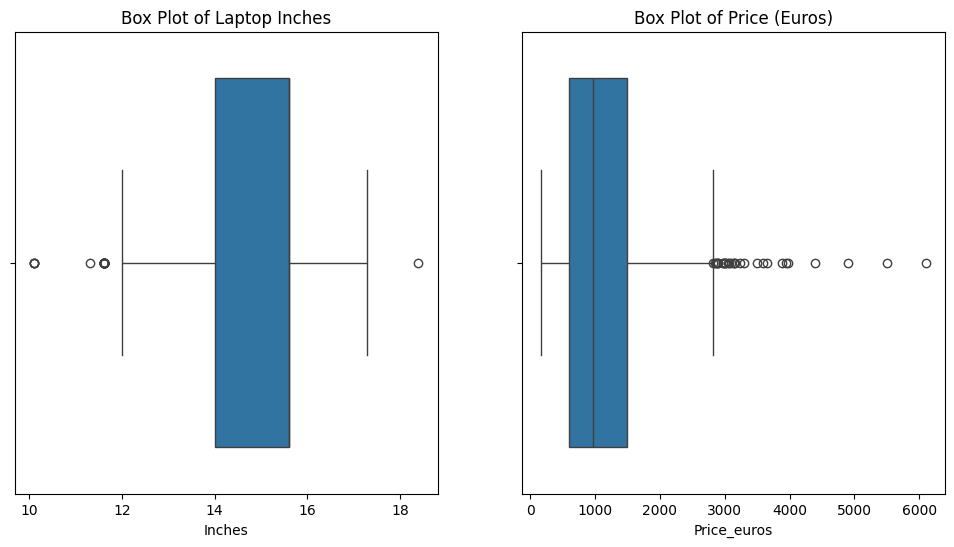

In [35]:
# Detect and visualize outliers using box plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Inches'])
plt.title('Box Plot of Laptop Inches')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Price_euros'])
plt.title('Box Plot of Price (Euros)')

plt.show()

# Removing outliers beyond the 99th percentile in Price_euros
df = df[df['Price_euros'] < df['Price_euros'].quantile(0.99)]

In [36]:
# Create new features from 'ScreenResolution'
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)
df['IPS_Panel'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS Panel' in x else 0)

# Extract resolution values and calculate total pixels
def get_resolution(resolution_str):
    res = resolution_str.split()[-1]
    width, height = res.split('x')
    return int(width), int(height)

df['X_res'], df['Y_res'] = zip(*df['ScreenResolution'].apply(get_resolution))
df['Pixels'] = df['X_res'] * df['Y_res']

# Display the new features
df[['ScreenResolution', 'Touchscreen', 'IPS_Panel', 'Pixels']].head()

,ScreenResolution,Touchscreen,IPS_Panel,Pixels
0,IPS Panel Retina Display 2560x1600,0,1,4096000
1,1440x900,0,0,1296000
2,Full HD 1920x1080,0,0,2073600
3,IPS Panel Retina Display 2880x1800,0,1,5184000
4,IPS Panel Retina Display 2560x1600,0,1,4096000


To use categorical features like Company, TypeName, ScreenResolution, Cpu, Ram, Memory, Gpu, and OpSys in a linear regression model, you need to convert them into a numerical format.
Screen Resolution to Pixels: Extract the numerical resolution values from the ScreenResolution column and create a new feature for the total number of pixels by multiplying width and height. For example, "1920x1080" would become 2,073,600 pixels.
Ram and Weight as Numerical: The Ram and Weight columns are currently object types (e.g., '8GB', '1.37kg'). You need to clean them by removing 'GB' and 'kg' and converting the values to numerical data types (e.g., integer or float).

Screen Type: Extract features from ScreenResolution, such as whether the screen is a Retina Display, has a touchscreen, or is an IPS Panel. These are binary features (1 or 0) that could be strong price predictors.

Memory Features: The Memory column is complex (e.g., '128GB SSD', '1TB HDD'). You can separate it into multiple features, such as the storage size and the storage type (SSD, HDD, Flash Storage, etc.). For instance, you could create a binary feature Is_SSD and a numerical feature Storage_Size_GB.

In [37]:
# Create new features from 'Memory'
def get_memory_info(memory_str):
    mem_str = memory_str.replace('.0', '').replace('GB', '').replace('SSD', 'SSD ').replace('HDD', 'HDD ').strip()
    mem_list = mem_str.split()

    storage_size_gb = 0
    storage_type = 'None'

    # Check for storage type first
    for word in mem_list:
        if word in ['SSD', 'HDD', 'Flash', 'Hybrid']:
            storage_type = word

    # Extract size
    for word in mem_list:
        if word.isdigit():
            storage_size_gb += int(word)

    return storage_size_gb, storage_type

df[['Storage_Size_GB', 'Storage_Type']] = df['Memory'].apply(lambda x: pd.Series(get_memory_info(x)))
df[['Memory', 'Storage_Size_GB', 'Storage_Type']].head()

,Memory,Storage_Size_GB,Storage_Type
0,128GB SSD,128,SSD
1,128GB Flash Storage,128,Flash
2,256GB SSD,256,SSD
3,512GB SSD,512,SSD
4,256GB SSD,256,SSD


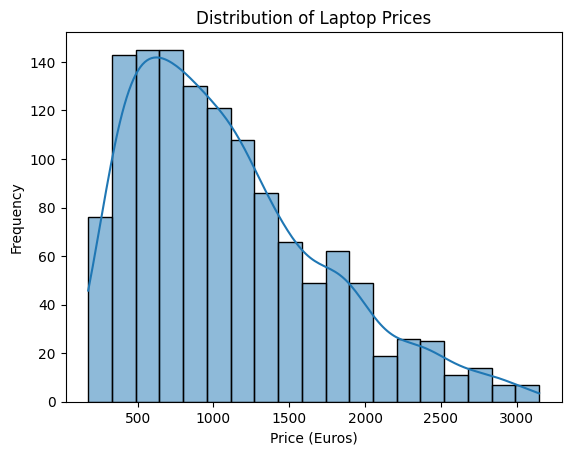

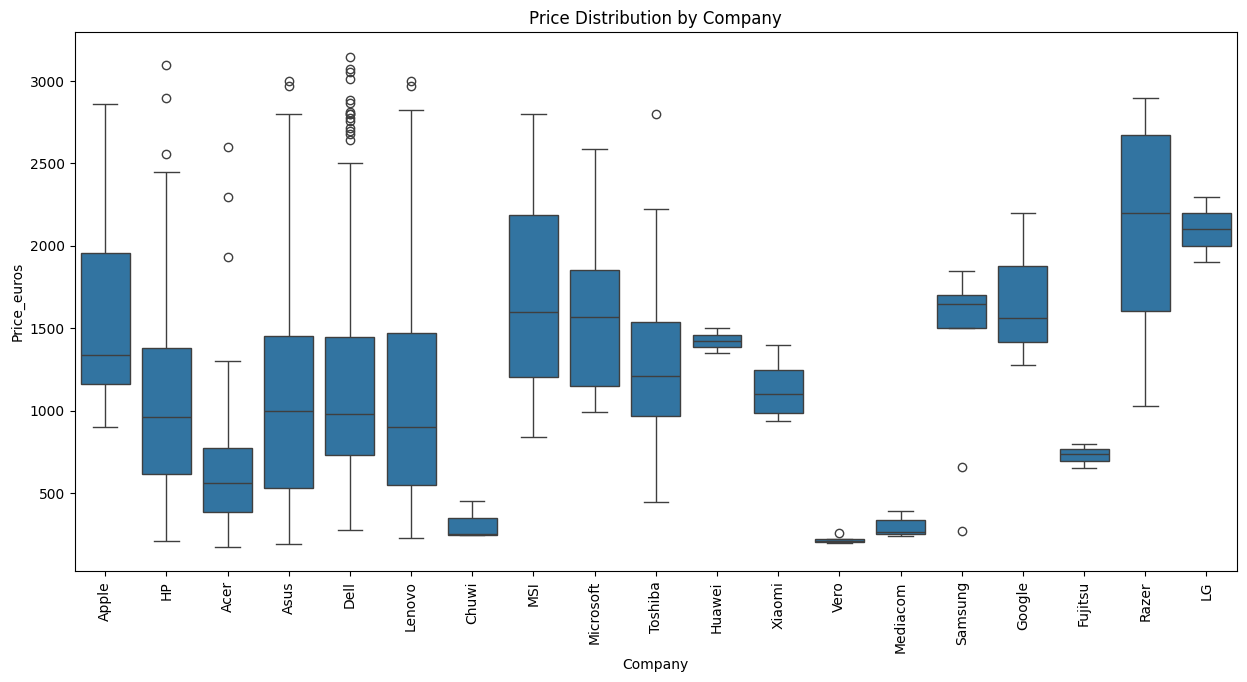

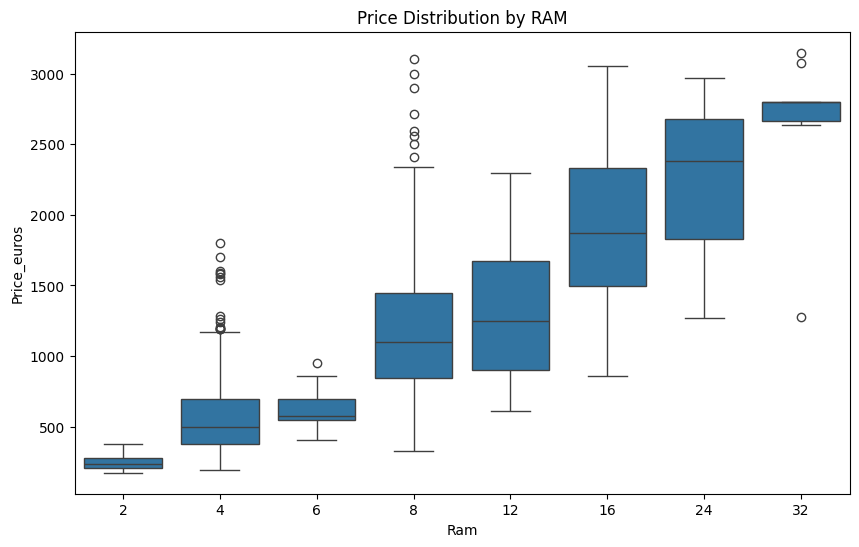

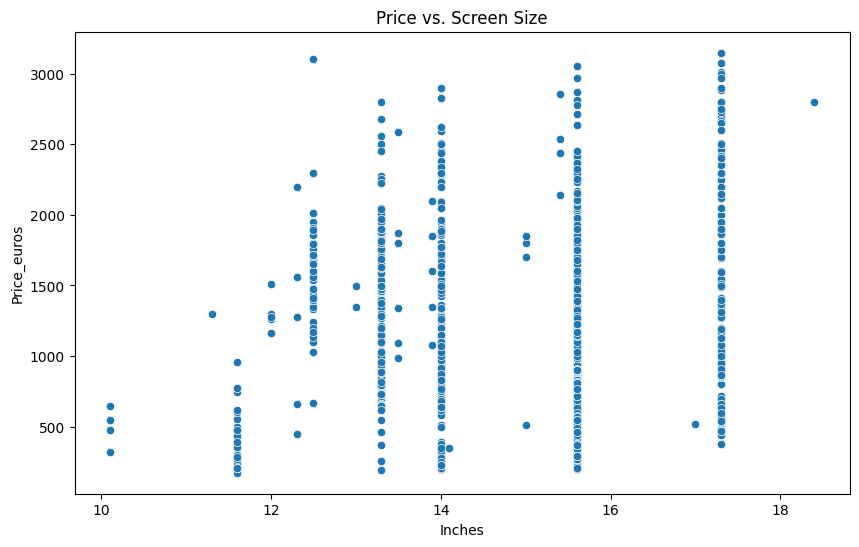

In [38]:
# Exploratory Data Analysis (EDA) and Visualization
# Distribution of Price
sns.histplot(df['Price_euros'], kde=True)
plt.title('Distribution of Laptop Prices')
plt.xlabel('Price (Euros)')
plt.ylabel('Frequency')
plt.show()

# Price vs. Company
plt.figure(figsize=(15, 7))
sns.boxplot(x='Company', y='Price_euros', data=df)
plt.xticks(rotation='vertical')
plt.title('Price Distribution by Company')
plt.show()

# Price vs. Ram
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ram', y='Price_euros', data=df)
plt.title('Price Distribution by RAM')
plt.show()

# Price vs. Inches
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Inches', y='Price_euros', data=df)
plt.title('Price vs. Screen Size')
plt.show()

Distribution of Price: A histogram or a density plot of the Price_euros column will show the overall price distribution. It's likely skewed to the right, indicating most laptops are in a lower price range with a few very expensive ones.

Price vs. Categorical Features:
Price by Company: The box plot shows the price distribution for each company, highlighting which brands have a wider price range or are generally more expensive. [image-tag: Price Distribution by Company]

Price by RAM: The box plot reveals a strong positive relationship between RAM and price. Laptops with higher RAM generally have a higher median price and a wider price range. [image-tag: Price Distribution by RAM]

Price vs. Screen Size: The scatter plot shows the relationship between screen size and price. While there is no clear linear correlation, it appears that a wider range of prices is available for larger screen sizes, such as 15.6 inches.

In [39]:
# Drop the original features that are no longer needed
df.drop(columns=['laptop_ID', 'Product', 'ScreenResolution', 'Memory', 'Cpu', 'Gpu', 'OpSys'], inplace=True)

# One-Hot Encoding for selected categorical features
df_encoded = pd.get_dummies(df, columns=['Company', 'TypeName', 'Storage_Type'], drop_first=True)

# Display the first few rows of the encoded DataFrame
df_encoded.head()

,Inches,Ram,Weight,Price_euros,Touchscreen,IPS_Panel,X_res,Y_res,Pixels,Storage_Size_GB,...,Company_Vero,Company_Xiaomi,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,Storage_Type_HDD,Storage_Type_Hybrid,Storage_Type_SSD
0,13.3,8,1.37,1339.69,0,1,2560,1600,4096000,128,...,False,False,False,False,False,True,False,False,False,True
1,13.3,8,1.34,898.94,0,0,1440,900,1296000,128,...,False,False,False,False,False,True,False,False,False,False
2,15.6,8,1.86,575.00,0,0,1920,1080,2073600,256,...,False,False,False,False,True,False,False,False,False,True
3,15.4,16,1.83,2537.45,0,1,2880,1800,5184000,512,...,False,False,False,False,False,True,False,False,False,True
4,13.3,8,1.37,1803.60,0,1,2560,1600,4096000,256,...,False,False,False,False,False,True,False,False,False,True


One-Hot Encoding: This is ideal for nominal variables where there's no inherent order. It creates new binary columns for each unique category within a feature. For example, the TypeName column with categories like 'Ultrabook' and 'Notebook' would be converted into two new columns, TypeName_Ultrabook and TypeName_Notebook, with a value of 1 if the condition is met and 0 otherwise. This prevents the model from assuming an arbitrary numerical order between categories.

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Display the shape and info of our encoded dataset
print("Dataset shape after encoding:", df_encoded.shape)
print("\nDataset info:")
print(df_encoded.info())

Dataset shape after encoding: (1289, 36)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 1289 entries, 0 to 1302
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Inches                1289 non-null   float64
 1   Ram                   1289 non-null   int64  
 2   Weight                1289 non-null   float64
 3   Price_euros           1289 non-null   float64
 4   Touchscreen           1289 non-null   int64  
 5   IPS_Panel             1289 non-null   int64  
 6   X_res                 1289 non-null   int64  
 7   Y_res                 1289 non-null   int64  
 8   Pixels                1289 non-null   int64  
 9   Storage_Size_GB       1289 non-null   int64  
 10  Company_Apple         1289 non-null   bool   
 11  Company_Asus          1289 non-null   bool   
 12  Company_Chuwi         1289 non-null   bool   
 13  Company_Dell          1289 non-null   bool   
 14  Company_Fujitsu      

In [41]:
# Separate features (X) and target variable (y)
X = df_encoded.drop('Price_euros', axis=1)
y = df_encoded['Price_euros']

print("Features shape:", X.shape)
print("Target variable shape:", y.shape)
print("\nFeature columns:")
print(X.columns.tolist())

Features shape: (1289, 35)
Target variable shape: (1289,)

Feature columns:
['Inches', 'Ram', 'Weight', 'Touchscreen', 'IPS_Panel', 'X_res', 'Y_res', 'Pixels', 'Storage_Size_GB', 'Company_Apple', 'Company_Asus', 'Company_Chuwi', 'Company_Dell', 'Company_Fujitsu', 'Company_Google', 'Company_HP', 'Company_Huawei', 'Company_LG', 'Company_Lenovo', 'Company_MSI', 'Company_Mediacom', 'Company_Microsoft', 'Company_Razer', 'Company_Samsung', 'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi', 'TypeName_Gaming', 'TypeName_Netbook', 'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation', 'Storage_Type_HDD', 'Storage_Type_Hybrid', 'Storage_Type_SSD']


In [42]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=None  # For regression, we don't stratify
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Test target shape:", y_test.shape)

Training set shape: (1031, 35)
Test set shape: (258, 35)
Training target shape: (1031,)
Test target shape: (258,)


In [43]:
# Feature scaling (standardization) - important for linear regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully!")
print("Training set mean (should be ~0):", np.mean(X_train_scaled, axis=0)[:5])
print("Training set std (should be ~1):", np.std(X_train_scaled, axis=0)[:5])

Features scaled successfully!
Training set mean (should be ~0): [ 5.92693262e-16 -4.99654203e-17  1.55065098e-16  4.47965837e-17
  5.42727841e-17]
Training set std (should be ~1): [1. 1. 1. 1. 1.]


In [44]:
# Build and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

print("Linear Regression model trained successfully!")
print("Model coefficients shape:", model.coef_.shape)
print("Model intercept:", model.intercept_)

Linear Regression model trained successfully!
Model coefficients shape: (35,)
Model intercept: 1089.4664694471392


In [45]:
# Make predictions on both training and test sets
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

print("Predictions completed!")
print("Training predictions shape:", y_train_pred.shape)
print("Test predictions shape:", y_test_pred.shape)

Predictions completed!
Training predictions shape: (1031,)
Test predictions shape: (258,)


In [46]:
# Model Evaluation - Calculate performance metrics

# Training set metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Test set metrics
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("=" * 50)
print("MODEL PERFORMANCE EVALUATION")
print("=" * 50)

print("\nTRAINING SET METRICS:")
print(f"RMSE: {train_rmse:.2f} euros")
print(f"MAE:  {train_mae:.2f} euros")
print(f"R²:   {train_r2:.4f}")

print("\nTEST SET METRICS:")
print(f"RMSE: {test_rmse:.2f} euros")
print(f"MAE:  {test_mae:.2f} euros")
print(f"R²:   {test_r2:.4f}")

print("\nMODEL INTERPRETATION:")
print(f"• The model explains {test_r2:.1%} of the variance in laptop prices")
print(f"• On average, predictions are off by {test_mae:.0f} euros")
print(f"• Root mean squared error indicates typical errors of {test_rmse:.0f} euros")

MODEL PERFORMANCE EVALUATION

TRAINING SET METRICS:
RMSE: 326.95 euros
MAE:  244.49 euros
R²:   0.7308

TEST SET METRICS:
RMSE: 331.85 euros
MAE:  255.09 euros
R²:   0.7079

MODEL INTERPRETATION:
• The model explains 70.8% of the variance in laptop prices
• On average, predictions are off by 255 euros
• Root mean squared error indicates typical errors of 332 euros


TOP 15 MOST INFLUENTIAL FEATURES:
             Feature  Coefficient  Abs_Coefficient
               X_res   587.333368       587.333368
               Y_res  -274.953069       274.953069
                 Ram   262.361686       262.361686
              Pixels  -190.260398       190.260398
   TypeName_Notebook  -153.816833       153.816833
              Weight   128.464910       128.464910
    Storage_Type_SSD   109.963315       109.963315
              Inches   -96.953972        96.953972
          Company_HP    91.364466        91.364466
TypeName_Workstation    87.716828        87.716828
         Company_MSI    72.534193        72.534193
     Storage_Size_GB    69.853221        69.853221
     Company_Toshiba    64.402256        64.402256
      Company_Lenovo    57.045938        57.045938
    Storage_Type_HDD    55.820380        55.820380


C:\Users\tomud\AppData\Local\Temp\ipykernel_28128\3290974824.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, y='Feature', x='Abs_Coefficient', palette='viridis')


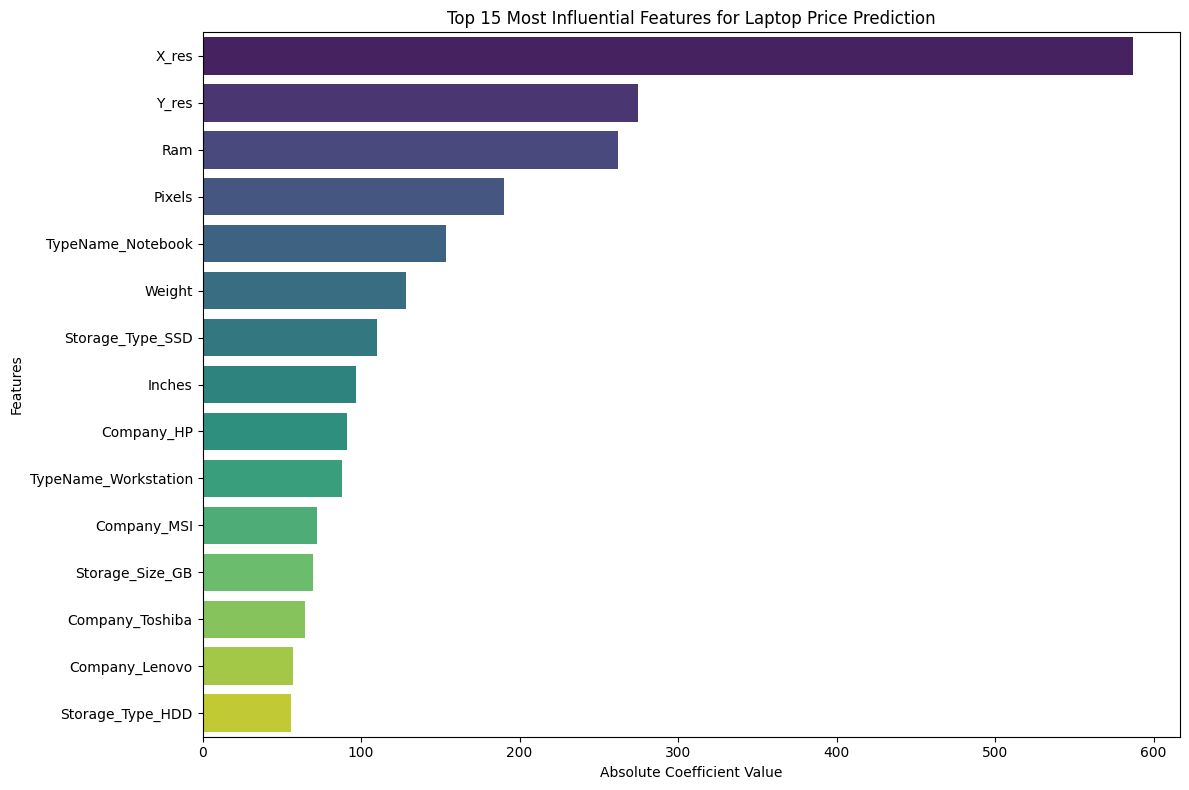

In [47]:
# Feature importance analysis - identify most influential features
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_,
    'Abs_Coefficient': np.abs(model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print("TOP 15 MOST INFLUENTIAL FEATURES:")
print("=" * 50)
print(feature_importance.head(15).to_string(index=False))

# Visualize feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
sns.barplot(data=top_features, y='Feature', x='Abs_Coefficient', palette='viridis')
plt.title('Top 15 Most Influential Features for Laptop Price Prediction')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

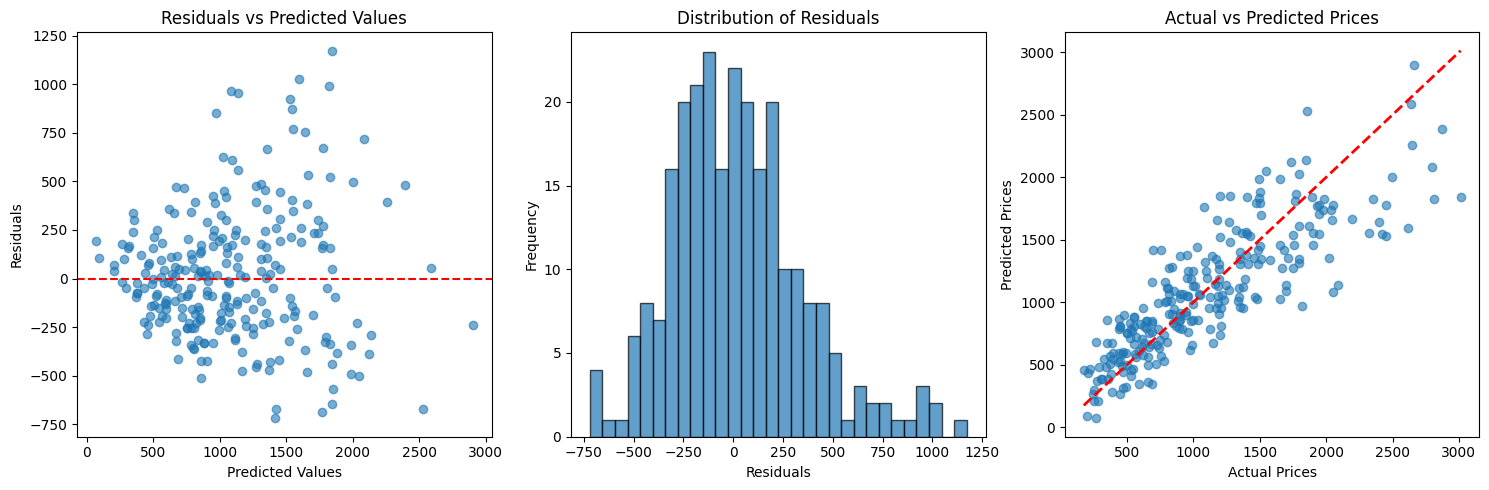

In [48]:
# Residual Analysis - Check model assumptions
residuals = y_test - y_test_pred

plt.figure(figsize=(15, 5))

# Residuals vs Predicted Values
plt.subplot(1, 3, 1)
plt.scatter(y_test_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')

# Histogram of Residuals
plt.subplot(1, 3, 2)
plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

# Actual vs Predicted
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')

plt.tight_layout()
plt.show()

In [49]:
# Model performance summary and interpretation
print("=" * 60)
print("COMPREHENSIVE MODEL EVALUATION SUMMARY")
print("=" * 60)

print(f"\n DATASET OVERVIEW:")
print(f"   • Total samples: {len(df_encoded):,}")
print(f"   • Features used: {X.shape[1]}")
print(f"   • Training samples: {len(X_train):,}")
print(f"   • Test samples: {len(X_test):,}")

print(f"\n MODEL PERFORMANCE:")
print(f"   • R² Score: {test_r2:.4f} ({test_r2:.1%} variance explained)")
print(f"   • RMSE: {test_rmse:.2f} euros")
print(f"   • MAE: {test_mae:.2f} euros")

print(f"\n MODEL QUALITY ASSESSMENT:")
if test_r2 > 0.8:
    quality = "Excellent"
elif test_r2 > 0.7:
    quality = "Good"
elif test_r2 > 0.6:
    quality = "Fair"
else:
    quality = "Needs Improvement"

print(f"   • Overall Quality: {quality}")
print(f"   • Overfitting Check: ", end="")
if abs(train_r2 - test_r2) < 0.05:
    print(" No significant overfitting detected")
else:
    print(" Possible overfitting (train R² - test R² = {:.3f})".format(train_r2 - test_r2))

print(f"\n KEY INSIGHTS:")
top_3_features = feature_importance.head(3)['Feature'].tolist()
print(f"   • Top 3 price drivers: {', '.join(top_3_features)}")
print(f"   • Average prediction error: ±{test_mae:.0f} euros")
print(f"   • Model reliability: {test_r2:.1%} of price variation is predictable")

COMPREHENSIVE MODEL EVALUATION SUMMARY

 DATASET OVERVIEW:
   • Total samples: 1,289
   • Features used: 35
   • Training samples: 1,031
   • Test samples: 258

 MODEL PERFORMANCE:
   • R² Score: 0.7079 (70.8% variance explained)
   • RMSE: 331.85 euros
   • MAE: 255.09 euros

 MODEL QUALITY ASSESSMENT:
   • Overall Quality: Good
   • Overfitting Check:  No significant overfitting detected

 KEY INSIGHTS:
   • Top 3 price drivers: X_res, Y_res, Ram
   • Average prediction error: ±255 euros
   • Model reliability: 70.8% of price variation is predictable


In [50]:
# Save the trained model and scaler using joblib
import joblib

# Save the trained model
joblib.dump(model, 'laptop_price_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

# Save feature names for later use
joblib.dump(X.columns.tolist(), 'feature_names.pkl')

print("Model, scaler, and feature names saved successfully!")
print("Files created:")
print("• laptop_price_model.pkl")
print("• scaler.pkl") 
print("• feature_names.pkl")

Model, scaler, and feature names saved successfully!
Files created:
• laptop_price_model.pkl
• scaler.pkl
• feature_names.pkl
